In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.dropna(inplace=True)

<Axes: xlabel='Aggregate rating', ylabel='Count'>

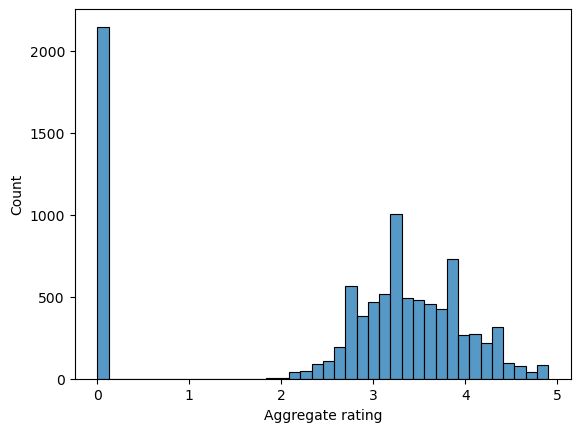

In [7]:
sns.histplot(df['Aggregate rating'],bins=40)

<Axes: ylabel='count'>

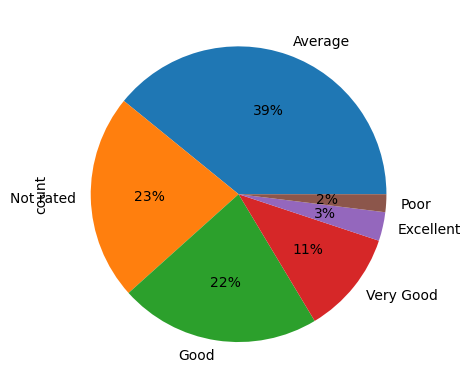

In [8]:
df['Rating text'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: xlabel='Rating text', ylabel='Aggregate rating'>

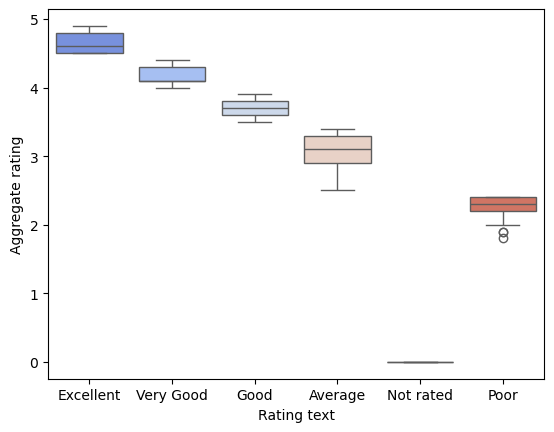

In [9]:
sns.boxplot(x='Rating text',y='Aggregate rating',data=df,hue='Rating text',palette='coolwarm')

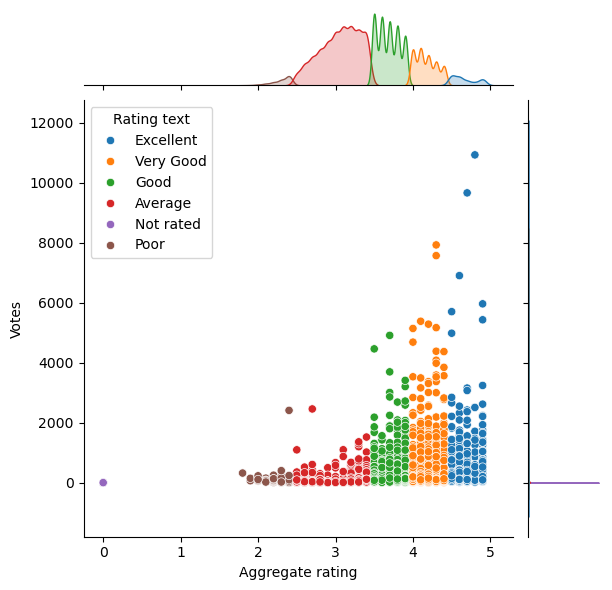

In [10]:
sns.jointplot(x='Aggregate rating',y='Votes',data=df,hue='Rating text')

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: xlabel='Country Code', ylabel='count'>

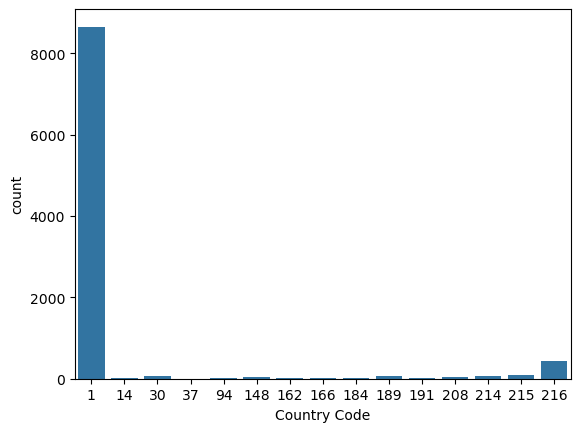

In [12]:
sns.barplot(df['Country Code'].value_counts())

In [13]:
df['City'].nunique()

140

In [14]:
Top10_city=df['City'].value_counts().head(10)
Top10_city

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='count'>

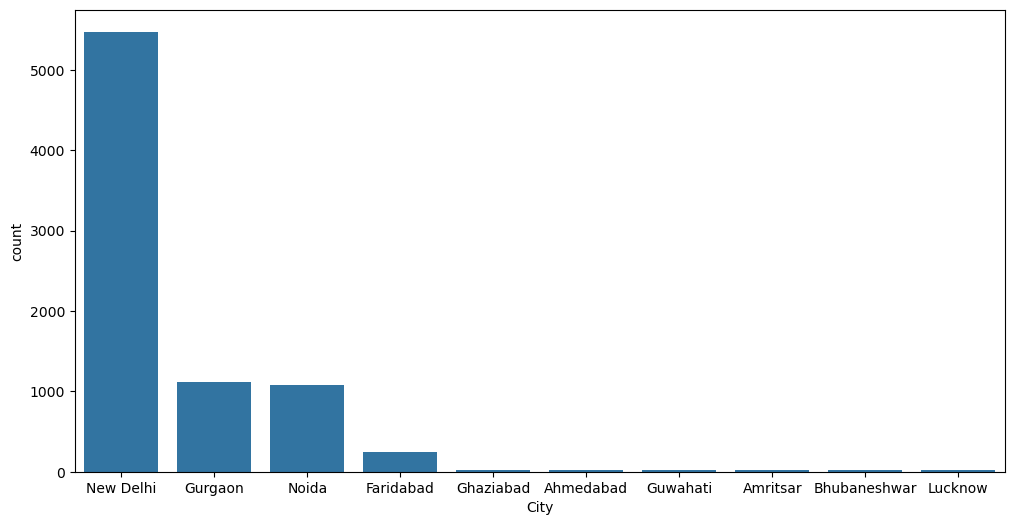

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(Top10_city)

In [16]:
df['Cuisines'].nunique()

1825

<Axes: xlabel='Cuisines', ylabel='count'>

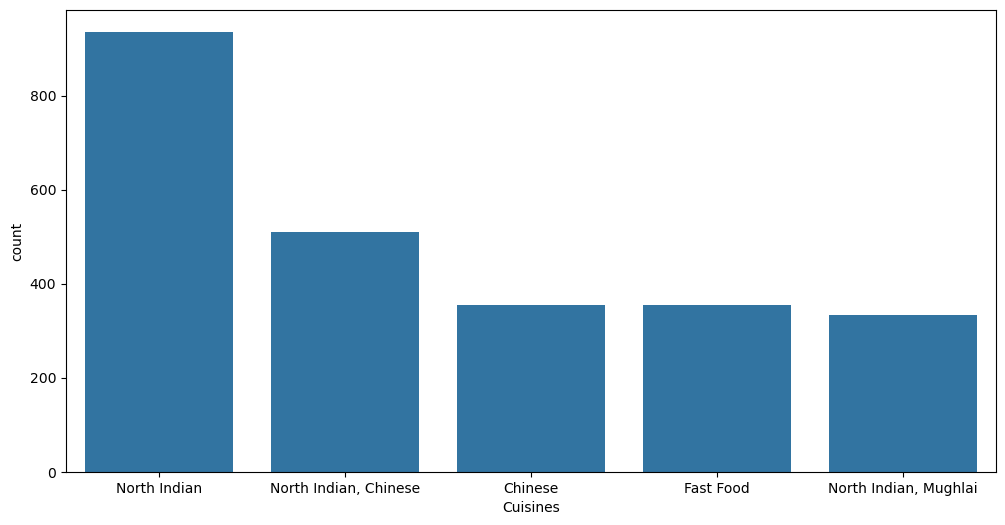

In [17]:
Top10_Cuisines=df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(12,6))
sns.barplot(Top10_Cuisines)

<Axes: xlabel='Price range', ylabel='count'>

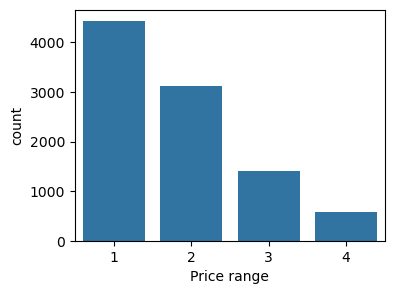

In [18]:
plt.figure(figsize=(4,3))
sns.barplot(df['Price range'].value_counts())

<Axes: xlabel='Country Code'>

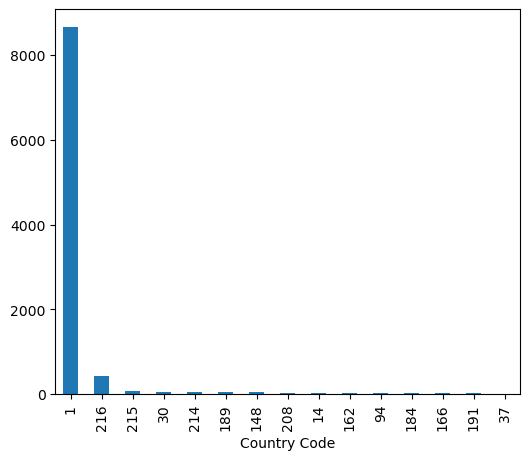

In [19]:
plt.figure(figsize=(6,5))
df['Country Code'].value_counts().plot(kind='bar')

In [20]:
#Top 5 City with heighest number of restaurants
df['City'].value_counts().head(5)

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

In [21]:
#Top 5 Cuisines 
df['Cuisines'].value_counts().head(5)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

<Axes: >

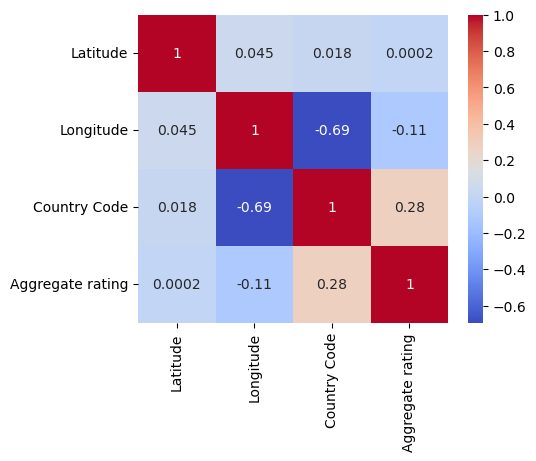

In [22]:
plt.figure(figsize=(5,4))
correlation = df[['Latitude', 'Longitude','Country Code','Aggregate rating']].corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [23]:
#Most common price range
df['Price range'].value_counts().head(1)

Price range
1    4438
Name: count, dtype: int64

In [24]:
#Average rating for each price range.
print("Average rating for each price range.\n")
Rating_on_price=df[['Aggregate rating','Price range']].groupby("Price range").mean()
Rating_on_price

Average rating for each price range.



,Aggregate rating
Price range,
1,1.997476
2,2.941054
3,3.682633
4,3.817918


In [25]:
df['Has Table booking']=df['Has Table booking'].apply(lambda s: 1 if s=='Yes' else 0)
df['Has Online delivery']=df['Has Online delivery'].apply(lambda s: 1 if s=='Yes' else 0)
df['Is delivering now']=df['Is delivering now'].apply(lambda s: 1 if s=='Yes' else 0)
df['Switch to order menu']=df['Switch to order menu'].apply(lambda s: 1 if s=='Yes' else 0)

In [26]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


In [27]:
df.drop(['Restaurant ID','Restaurant Name','Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Switch to order menu','Rating color','Currency','Rating text','Votes'],axis=1,inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Cuisines']=encoder.fit_transform(df['Cuisines'])

In [29]:
df.head()

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating
0,920,1100,1,0,0,3,4.8
1,1111,1200,1,0,0,3,4.5
2,1671,4000,1,0,0,4,4.4
3,1126,1500,0,0,0,4,4.9
4,1122,1500,1,0,0,4,4.8


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
X=df.drop('Aggregate rating',axis=1)
y=df['Aggregate rating']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
#Creating a Linear Regression model
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

In [34]:
#Evaluating the Linear Regression model
print(f"Mean absolute error : {mean_absolute_error(y_test,pred1)}")
print(f"\nMean Squared Error : {mean_squared_error(y_test,pred1)}") 
print(f"\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,pred1))}") 

Mean absolute error : 1.0765968286519523

Mean Squared Error : 1.718783196551302

Root Mean Squared Error : 1.3110237208194602


In [35]:
#Creating a decision tree model
from sklearn.tree import DecisionTreeRegressor,plot_tree
model2=DecisionTreeRegressor(random_state=1)
model2.fit(X_train,y_train)
pred2=model2.predict(X_test)

In [36]:
#Evaluating the decision tree model
print(f"Mean absolute error : {mean_absolute_error(y_test,pred2)}")
print(f"\nMean Squared Error : {mean_squared_error(y_test,pred2)}") 
print(f"\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,pred2))}") 

Mean absolute error : 1.001744702389214

Mean Squared Error : 1.8656274531891883

Root Mean Squared Error : 1.365879735990394


In [37]:
#Creating a Random forest model
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(random_state=1)
model3.fit(X_train,y_train)
pred3=model3.predict(X_test)

In [38]:
#Evaluating the Random forest model
print(f"Mean absolute error : {mean_absolute_error(y_test,pred3)}")
print(f"\nMean Squared Error : {mean_squared_error(y_test,pred3)}") 
print(f"\nRoot Mean Squared Error : {np.sqrt(mean_squared_error(y_test,pred3))}") 

Mean absolute error : 0.9565729283525708

Mean Squared Error : 1.6250424731023088

Root Mean Squared Error : 1.2747715376106845


In [39]:
#The random forest model shows less error when compared to the other two models.